In [17]:
import sys
sys.path.append('../../')
import time 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from qsopt.plots import plot_countour
from qsopt.optim import method_optim

### Questão 1

#### Letra (a)


  $$f(x_{1}, x{2})= x_{1}^{2}-3x_{1}x_{2}+4x_{2}^{2}+x_{1}-x_{2}$$

pontos iniciais $x_{0} =\{2,2\}^{t}$ e $x_{0}=\{-1,-3\}^{t}$

In [18]:
import sympy as sy
from sympy import *
x1, x2 = sy.symbols("x1 x2")
func = x1**2-3*x1*x2+4*x2**2+x1-x2
print('Objective Function: ', func)
print('Gradient: ', Matrix([func]).jacobian(Matrix(list(func.free_symbols))))
print('Hessian: ', sy.hessian(func, varlist=[x1, x2]))


Objective Function:  x1**2 - 3*x1*x2 + x1 + 4*x2**2 - x2
Gradient:  Matrix([[-3*x1 + 8*x2 - 1, 2*x1 - 3*x2 + 1]])
Hessian:  Matrix([[2, -3], [-3, 8]])


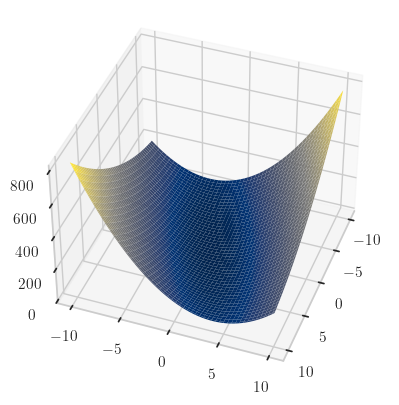

In [19]:
np.random.seed(1234)
f = lambda x: x[0]**[2]-3*x[0]*x[1]+4*x[1]**2+x[0]-x[1]
grad = lambda x: np.array([2*x[0]-3*x[1]+1, -3*x[0]+8*x[1]-1])
hess = lambda x: np.array([[2, -3], [-3, 8]])

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(40, 20)
ax.plot_surface(X, Y, Z, cmap='cividis', linewidth =0)

Method        X0                                         XOPT  \
0         Univariant    [2, 2]  [-0.7142754661170031, -0.14285329572771135]   
1             Powell    [2, 2]   [-0.7142857075336313, -0.1428571394615532]   
2   Steepest Descent    [2, 2]  [-0.7142784130019904, -0.14285432170290968]   
3    Fletcher-Reeves    [2, 2]    [-0.714277770569285, -0.1428543536949978]   
4               BFGS    [2, 2]   [-0.7142693334952367, -0.1428442319409616]   
5     Newton-Raphson    [2, 2]  [-0.7142857208607527, -0.14285714804796262]   
6         Univariant  [-1, -3]  [-0.7142933931905581, -0.14286002570520448]   
7             Powell  [-1, -3]  [-0.7142857160850768, -0.14285714864861723]   
8   Steepest Descent  [-1, -3]    [-0.7142941460457664, -0.142860596034362]   
9    Fletcher-Reeves  [-1, -3]    [-0.714287663231131, -0.1428579277357921]   
10              BFGS  [-1, -3]    [-0.7142941460457664, -0.142860596034362]   
11    Newton-Raphson  [-1, -3]  [-0.7142857145640484, -0.14285714564048516]   

                      FMIN NUM_ITER          TIME  
0   [-0.28571428566833734]       22  2.384186e-06  
1   [-0.28571428571428575]        3  9.536743e-07  
2   [-0.28571428569093554]       31  1.430511e-06  
3   [-0.28571428568653445]       68  1.430511e-06  
4    [-0.2857142854136615]       28  1.430511e-06  
5   [-0.28571428571428575]        2  1.192093e-06  
6   [-0.28571428568848833]       23  1.907349e-06  
7    [-0.2857142857142857]        3  1.192093e-06  
8    [-0.2857142856828425]        7  1.430511e-06  
9    [-0.2857142857126123]       10  9.536743e-07  
10   [-0.2857142856828425]        7  9.536743e-07  
11   [-0.2857142857142858]        2  1.192093e-06

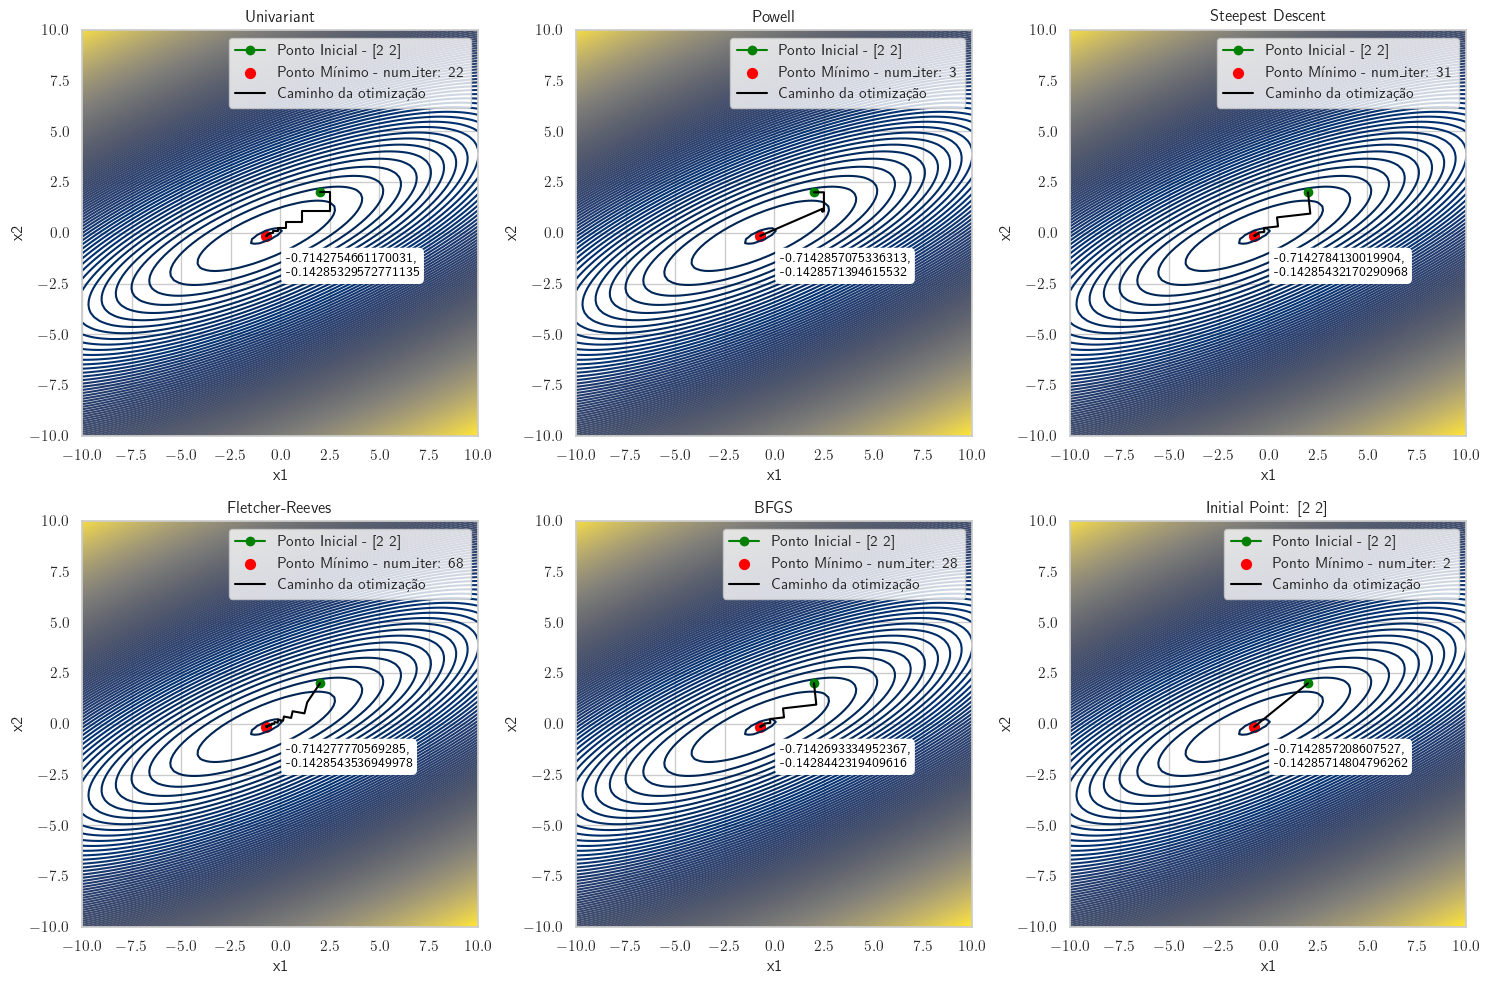

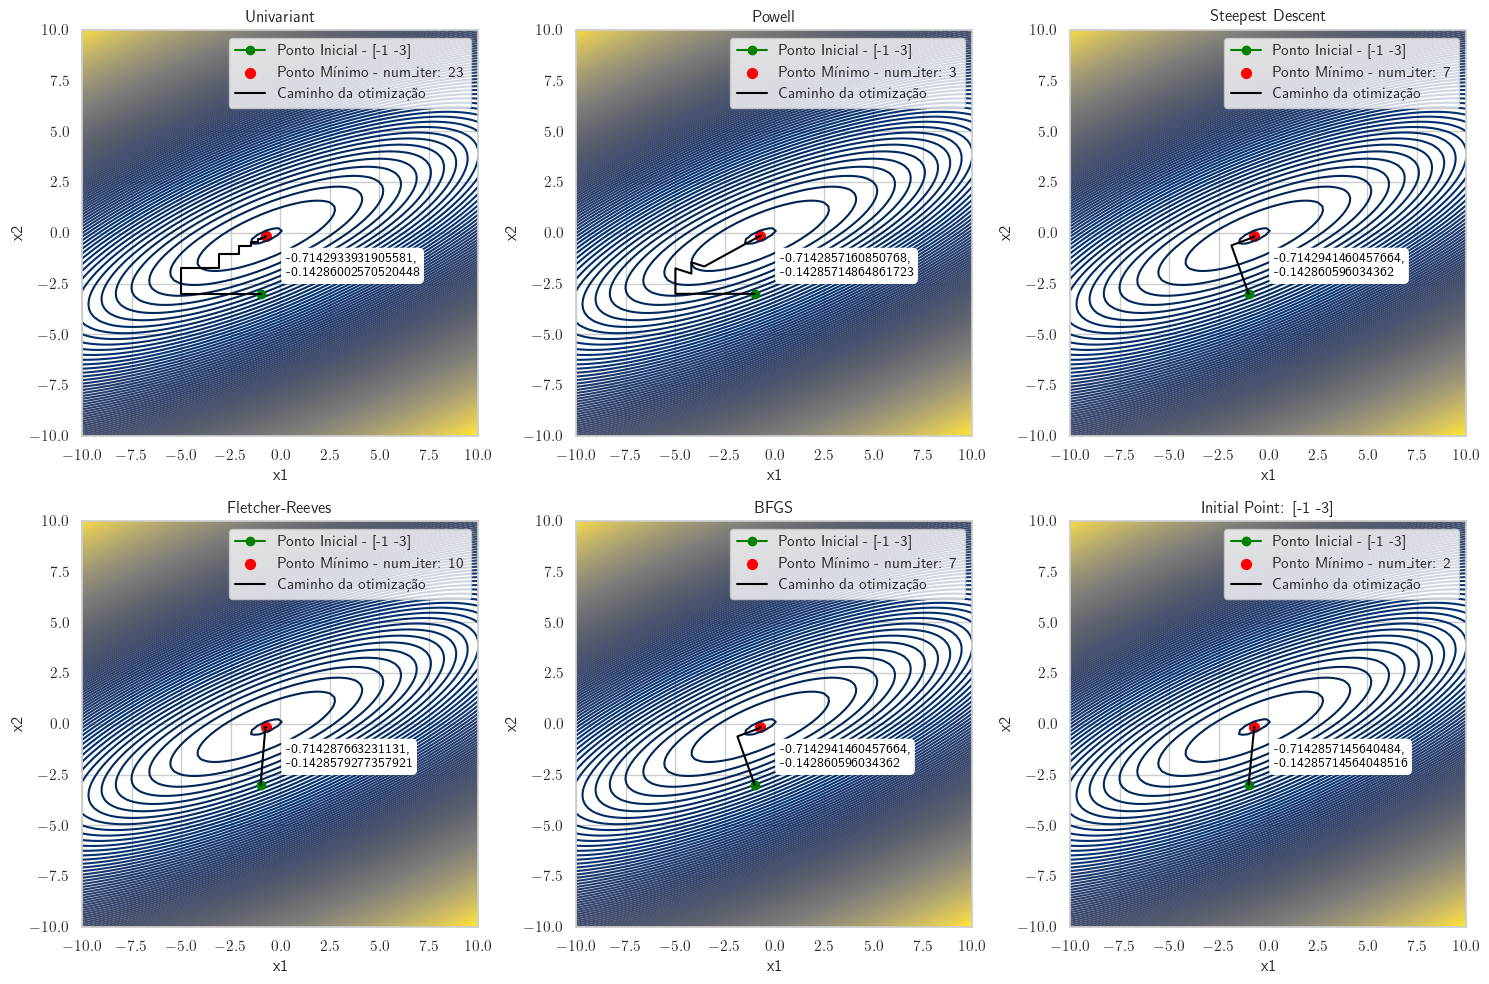

In [20]:
initial_point = [np.array([2,2]), np.array([-1,-3])]

result = pd.DataFrame(columns=['Method', 'X0', 'XOPT', 'FMIN', 'NUM_ITER', 'TIME'])
for x0 in initial_point:
    METHODS_OPTIM = {
        'univariant': method_optim(method_name='univariant', objective_function=f, gradient=grad, initial_point=x0),
        'powell': method_optim(method_name='powell', objective_function=f, gradient=grad, initial_point=x0),
        'steepest_descent': method_optim(method_name='steepest_descent', objective_function=f, gradient=grad, initial_point=x0),
        'fletcher_reeves': method_optim(method_name='fletcher_reeves', objective_function=f, gradient=grad, initial_point=x0),
        'bfgs': method_optim(method_name='bfgs', objective_function=f, gradient=grad, initial_point=x0),
        'newton_raphson': method_optim(method_name='newton_raphson', objective_function=f, gradient=grad, hessian=hess, initial_point=x0),
        }
    methods = ['univariant', 'powell', 'steepest_descent', 'fletcher_reeves', 'bfgs', 'newton_raphson']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    for i, m in enumerate(methods):
        start = time.time()
        method =  METHODS_OPTIM[m]
        end = time.time()
        time_elapsed = end - start
        r = pd.DataFrame([[method['method_name'], x0, method['xopt'], method['fmin'], method['num_iter'], time_elapsed]], 
                        columns=['Method', 'X0', 'XOPT', 'FMIN', 'NUM_ITER', 'TIME'])
        result = pd.concat([result, r], ignore_index=True, axis=0)
        plot_countour(f, x0, method, ax=axes[i], path = True, box_size = 10)
    plt.tight_layout()
    plt.title(f'Initial Point: {x0}')
    plt.savefig(f'img/questao_1a_{x0}.pdf'.format(x0))
result

#### Letra (b)


  $$f(x_{1}, x{2})= (1+a-b*x_1-b*x_2)^2+(b+x_1+a*x_2-b*x_1*x_2)^2$$

pontos iniciais $x_{0} =\{10,2\}^{t}$ e $x_{0}=\{-2,-3\}^{t}$

In [21]:
import sympy as sy
from sympy import *
a = 10
b = 1
x1, x2 = sy.symbols("x1 x2")
func = (1+a-b*x1-b*x2)**2+(b+x1+a*x2-b*x1*x2)**2
print('Objective Function: ', func)
print('Gradient: ', Matrix([func]).jacobian(Matrix(list(func.free_symbols))))
print('Hessian: ', sy.hessian(func, varlist=[x1, x2]))

Objective Function:  (-x1 - x2 + 11)**2 + (-x1*x2 + x1 + 10*x2 + 1)**2
Gradient:  Matrix([[2*x1 + 2*x2 + (20 - 2*x1)*(-x1*x2 + x1 + 10*x2 + 1) - 22, 2*x1 + 2*x2 + (2 - 2*x2)*(-x1*x2 + x1 + 10*x2 + 1) - 22]])
Hessian:  Matrix([[(1 - x2)*(2 - 2*x2) + 2, 2*x1*x2 - 2*x1 - 20*x2 + (2 - 2*x2)*(10 - x1)], [2*x1*x2 - 2*x1 - 20*x2 + (2 - 2*x2)*(10 - x1), (10 - x1)*(20 - 2*x1) + 2]])


In [22]:
print(sy.hessian(func, varlist=[x1, x2]))

Matrix([[(1 - x2)*(2 - 2*x2) + 2, 2*x1*x2 - 2*x1 - 20*x2 + (2 - 2*x2)*(10 - x1)], [2*x1*x2 - 2*x1 - 20*x2 + (2 - 2*x2)*(10 - x1), (10 - x1)*(20 - 2*x1) + 2]])


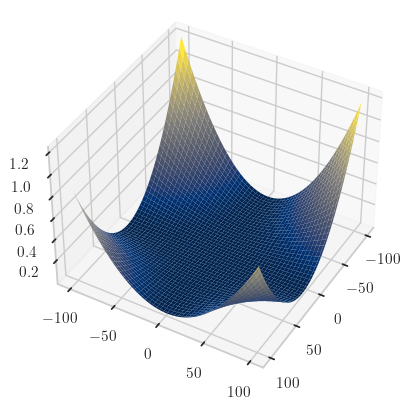

In [23]:
np.random.seed(1234)
a = 10
b = 1
f = lambda x: (1+a-b*x[0]-b*x[1])**2+(b+x[0]+a*x[1]-b*x[0]*x[1])**2
grad = lambda x: np.array([2*x[0]*x[1]**2-20*x[1]**2+20*x[1]-4*x[0]*x[1]+4*x[0]-20, 
                           2*x[0]**2*x[1]-2*x[0]**2+20*x[0]-40*x[0]*x[1]+202*x[1]-2])
hess = lambda x: np.array(([(1 - x[0])*(2 - 2*x[1]) + 2, 2*x[0]*x[1] - 2*x[0] - 20*x[1] + (2 - 2*x[1])*(10 - x[0])], 
                            [2*x[0]*x[1] - 2*x[0] - 20*x[1] + (2 - 2*x[1])*(10 - x[0]), (10 - x[0])*(20 - 2*x[0]) + 2]))
x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(40, 30)
ax.plot_surface(X, Y, Z, cmap='cividis', linewidth =0)

Method        X0                                      XOPT  \
0         Univariant   [10, 2]   [13.000000945698392, 3.999998827729604]   
1             Powell   [10, 2]     [13.00000002761136, 4.00000003570115]   
2   Steepest Descent   [10, 2]   [13.000001040942262, 3.999998699510193]   
3    Fletcher-Reeves   [10, 2]  [11.720050924084912, 2.4923677041579446]   
4               BFGS   [10, 2]  [13.000015663452377, 3.9999793667625014]   
5     Newton-Raphson   [10, 2]                [10.0, 0.9999997264865323]   
6         Univariant  [-2, -3]  [7.000001127801014, -2.0000013874722646]   
7             Powell  [-2, -3]  [7.000000011526467, -2.0000000317147055]   
8   Steepest Descent  [-2, -3]   [7.000001014298971, -2.000000934312371]   
9    Fletcher-Reeves  [-2, -3]  [7.000001450422155, -2.0000013527372316]   
10              BFGS  [-2, -3]   [7.000013152119488, -2.000021109448415]   
11    Newton-Raphson  [-2, -3]   [6.99999899684168, -1.9999991372119204]   

          FMIN NUM_ITER          TIME  
0    40.000000       32  1.668930e-06  
1    40.000000        5  7.152557e-07  
2    40.000000       55  9.536743e-07  
3    81.435992      100  9.536743e-07  
4    40.000000       43  9.536743e-07  
5   121.000000        2  4.768372e-07  
6    40.000000       30  2.384186e-06  
7    40.000000        4  9.536743e-07  
8    40.000000       45  9.536743e-07  
9    40.000000       42  9.536743e-07  
10   40.000000       36  1.430511e-06  
11   40.000000       27  1.192093e-06

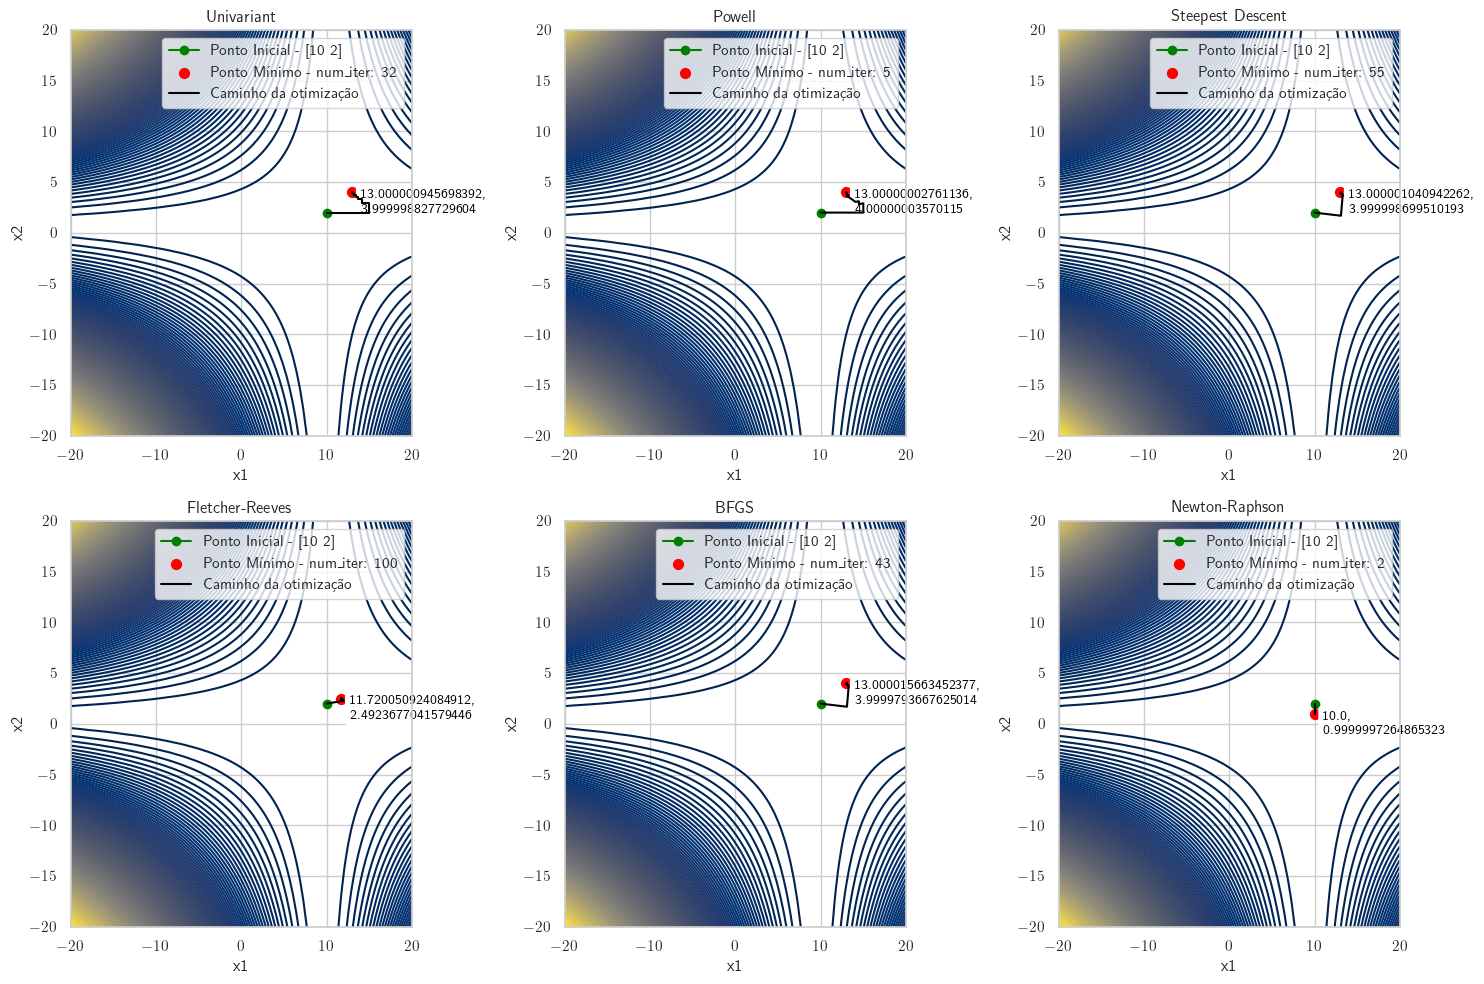

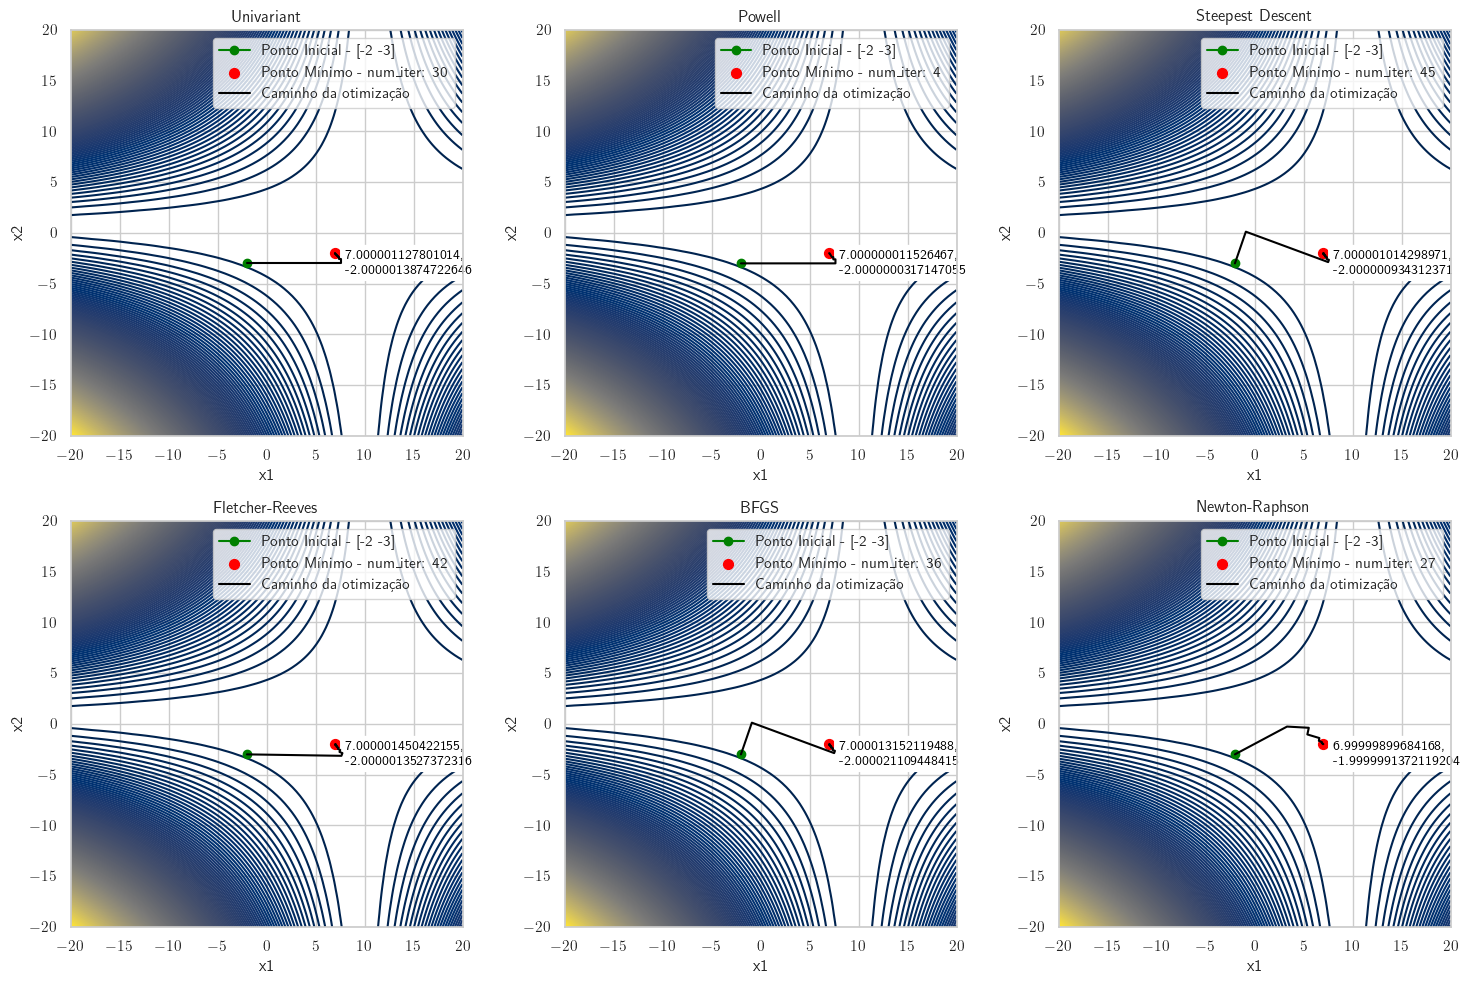

In [26]:
initial_point = [np.array([10,2]), np.array([-2,-3])]

result = pd.DataFrame(columns=['Method', 'X0', 'XOPT', 'FMIN', 'NUM_ITER', 'TIME'])
for x0 in initial_point:
    METHODS_OPTIM = {
        'univariant': method_optim(method_name='univariant', objective_function=f, gradient=grad, initial_point=x0),
        'powell': method_optim(method_name='powell', objective_function=f, gradient=grad, initial_point=x0),
        'steepest_descent': method_optim(method_name='steepest_descent', objective_function=f, gradient=grad, initial_point=x0),
        'fletcher_reeves': method_optim(method_name='fletcher_reeves', objective_function=f, gradient=grad, initial_point=x0),
        'bfgs': method_optim(method_name='bfgs', objective_function=f, gradient=grad, initial_point=x0),
        'newton_raphson': method_optim(method_name='newton_raphson', objective_function=f, gradient=grad, hessian=hess, initial_point=x0),
        }
    methods = ['univariant', 'powell', 'steepest_descent', 'fletcher_reeves', 'bfgs', 'newton_raphson']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    for i, m in enumerate(methods):
        start = time.time()
        method =  METHODS_OPTIM[m]
        end = time.time()
        time_elapsed = end - start
        r = pd.DataFrame([[method['method_name'], x0, method['xopt'], method['fmin'], method['num_iter'], time_elapsed]], 
                        columns=['Method', 'X0', 'XOPT', 'FMIN', 'NUM_ITER', 'TIME'])
        result = pd.concat([result, r], ignore_index=True, axis=0)
        plot_countour(f, x0, method, ax=axes[i], path = True, box_size = 20)
    plt.tight_layout()
    plt.savefig(f'img/questao_1b_{x0[1]}.pdf')
result

### Questão 2

$f(u, v) = \frac{1}{2}\frac{EA_{1}}{L_{1}}(\sqrt{(L_{1}+u)^{2}+v^{2}}-L_{1})^{2}+\frac{1}{2}\frac{EA_{2}}{L_{2}}(\sqrt{(L_{2}+u)^{2}+v^{2}}-L_{2})^{2}-P_{1}v$

- $L_{1}=12, L_{2}=8, EA_{1}=12, EA_{2}=80$

---

A função a ser minimizada é dada por:

$f(u,v) = (0.5\times(\sqrt{(12+x_{1})^2+x_{2}^2)-12)^2}+(0.5\times10\times(\sqrt{8+x1)^2+x_{2}^2)-8}^2-7\times x_{2})$

In [28]:
import sympy as sy
from sympy import *
x1, x2 = sy.symbols("x1 x2")
func = 0.5*(((12+x1)**2+x2**2)**0.5-12)**2 + 5*(((8-x1)**2+x2**2)**0.5-8)**2-7*x2
print('Objective Function: ', func)
print('Gradient: ', Matrix([func]).jacobian(Matrix(list(func.free_symbols))))
print('Hessian: ', sy.hessian(func, varlist=[x1, x2]))

Objective Function:  -7*x2 + 5*((x2**2 + (8 - x1)**2)**0.5 - 8)**2 + 0.5*((x2**2 + (x1 + 12)**2)**0.5 - 12)**2
Gradient:  Matrix([[10.0*x2*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2)**0.5 + 1.0*x2*((x2**2 + (x1 + 12)**2)**0.5 - 12)/(x2**2 + (x1 + 12)**2)**0.5 - 7, 10*(1.0*x1 - 8.0)*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2)**0.5 + 1.0*(1.0*x1 + 12.0)*((x2**2 + (x1 + 12)**2)**0.5 - 12)/(x2**2 + (x1 + 12)**2)**0.5]])
Hessian:  Matrix([[10*(8.0 - 1.0*x1)*(1.0*x1 - 8.0)*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2)**1.5 + 1.0*(-1.0*x1 - 12.0)*(1.0*x1 + 12.0)*((x2**2 + (x1 + 12)**2)**0.5 - 12)/(x2**2 + (x1 + 12)**2)**1.5 + 1.0*(144.0*(0.0833333333333333*x1 + 1)**2)/(x2**2 + (x1 + 12)**2)**1.0 + 10*(64.0*(0.125*x1 - 1)**2)/(x2**2 + (8 - x1)**2)**1.0 + 10.0*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2)**0.5 + 1.0*((x2**2 + (x1 + 12)**2)**0.5 - 12)/(x2**2 + (x1 + 12)**2)**0.5, -10.0*x2*(1.0*x1 - 8.0)*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2

In [29]:
Matrix([func]).jacobian(Matrix(list(func.free_symbols)))

Matrix([[10.0*x2*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2)**0.5 + 1.0*x2*((x2**2 + (x1 + 12)**2)**0.5 - 12)/(x2**2 + (x1 + 12)**2)**0.5 - 7, 10*(1.0*x1 - 8.0)*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2)**0.5 + 1.0*(1.0*x1 + 12.0)*((x2**2 + (x1 + 12)**2)**0.5 - 12)/(x2**2 + (x1 + 12)**2)**0.5]])

In [30]:
sy.hessian(func, varlist=[x1, x2])

Matrix([
[10*(8.0 - 1.0*x1)*(1.0*x1 - 8.0)*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2)**1.5 + 1.0*(-1.0*x1 - 12.0)*(1.0*x1 + 12.0)*((x2**2 + (x1 + 12)**2)**0.5 - 12)/(x2**2 + (x1 + 12)**2)**1.5 + 1.0*(144.0*(0.0833333333333333*x1 + 1)**2)/(x2**2 + (x1 + 12)**2)**1.0 + 10*(64.0*(0.125*x1 - 1)**2)/(x2**2 + (8 - x1)**2)**1.0 + 10.0*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2)**0.5 + 1.0*((x2**2 + (x1 + 12)**2)**0.5 - 12)/(x2**2 + (x1 + 12)**2)**0.5,                                                                                       -10.0*x2*(1.0*x1 - 8.0)*((x2**2 + (8 - x1)**2)**0.5 - 8)/(x2**2 + (8 - x1)**2)**1.5 + 10.0*x2*(1.0*x1 - 8.0)/(x2**2 + (8 - x1)**2)**1.0 - 1.0*x2*(1.0*x1 + 12.0)*((x2**2 + (x1 + 12)**2)**0.5 - 12)/(x2**2 + (x1 + 12)**2)**1.5 + 1.0*x2*(1.0*x1 + 12.0)/(x2**2 + (x1 + 12)**2)**1.0],
[                                                                                                                                                                  

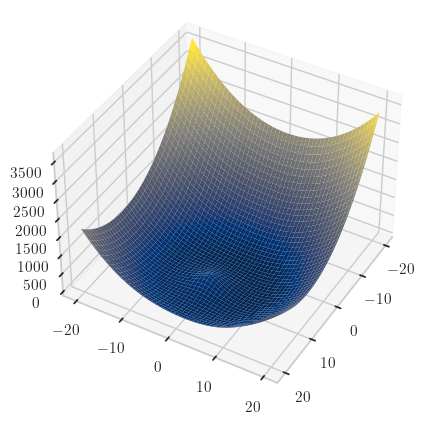

In [31]:
f = lambda x: 5*(((x[0] - 8)**2 + x[1]**2)**0.5 - 8)**2 - 7*x[1] + (((x[0] + 12)**2 + x[1]**2)**0.5 - 12)**2/2

grad = lambda x: np.array([(5*(((x[0] - 8)**2 + x[1]**2)**0.5 - 8)*(2*x[0] - 16))/((x[0] - 8)**2 + x[1]**2)**0.5 + ((((x[0] + 12)**2 + x[1]**2)**0.5 - 12)*(2*x[0] + 24))/(2*((x[0] + 12)**2 + x[1]**2)**0.5), (10*x[1]*(((x[0] - 8)**2 + x[1]**2)**0.5 - 8))/((x[0] - 8)**2 + x[1]**2)**0.5 + (x[1]*(((x[0] + 12)**2 + x[1]**2)**0.5 - 12))/((x[0] + 12)**2 + x[1]**2)**0.5 - 7])

hess = lambda x: np.array([[10*(8.0 - 1.0*x[0])*(1.0*x[0] - 8.0)*((x[1]**2 + (8 - x[0])**2)**0.5 - 8)/(x[1]**2 + (8 - x[0])**2)**1.5 + 1.0*(-1.0*x[0] - 12.0)*(1.0*x[0] + 12.0)*((x[1]**2 + (x[0] + 12)**2)**0.5 - 12)/(x[1]**2 + (x[0] + 12)**2)**1.5 + 1.0*(144.0*(0.0833333333333333*x[0] + 1)**2)/(x[1]**2 + (x[0] + 12)**2)**1.0 + 10*(64.0*(0.125*x[0] - 1)**2)/(x[1]**2 + (8 - x[0])**2)**1.0 + 10.0*((x[1]**2 + (8 - x[0])**2)**0.5 - 8)/(x[1]**2 + (8 - x[0])**2)**0.5 + 1.0*((x[1]**2 + (x[0] + 12)**2)**0.5 - 12)/(x[1]**2 + (x[0] + 12)**2)**0.5, -10.0*x[1]*(1.0*x[0] - 8.0)*((x[1]**2 + (8 - x[0])**2)**0.5 - 8)/(x[1]**2 + (8 - x[0])**2)**1.5 + 10.0*x[1]*(1.0*x[0] - 8.0)/(x[1]**2 + (8 - x[0])**2)**1.0 - 1.0*x[1]*(1.0*x[0] + 12.0)*((x[1]**2 + (x[0] + 12)**2)**0.5 - 12)/(x[1]**2 + (x[0] + 12)**2)**1.5 + 1.0*x[1]*(1.0*x[0] + 12.0)/(x[1]**2 + (x[0] + 12)**2)**1.0], 
                          [-10.0*x[1]*(1.0*x[0] - 8.0)*((x[1]**2 + (8 - x[0])**2)**0.5 - 8)/(x[1]**2 + (8 - x[0])**2)**1.5 + 10.0*x[1]*(1.0*x[0] - 8.0)/(x[1]**2 + (8 - x[0])**2)**1.0 - 1.0*x[1]*(1.0*x[0] + 12.0)*((x[1]**2 + (x[0] + 12)**2)**0.5 - 12)/(x[1]**2 + (x[0] + 12)**2)**1.5 + 1.0*x[1]*(1.0*x[0] + 12.0)/(x[1]**2 + (x[0] + 12)**2)**1.0, -10.0*x[1]**2*((x[1]**2 + (8 - x[0])**2)**0.5 - 8)/(x[1]**2 + (8 - x[0])**2)**1.5 + 10.0*x[1]**2/(x[1]**2 + (8 - x[0])**2)**1.0 - 1.0*x[1]**2*((x[1]**2 + (x[0] + 12)**2)**0.5 - 12)/(x[1]**2 + (x[0] + 12)**2)**1.5 + 1.0*x[1]**2/(x[1]**2 + (x[0] + 12)**2)**1.0 + 10.0*((x[1]**2 + (8 - x[0])**2)**0.5 - 8)/(x[1]**2 + (8 - x[0])**2)**0.5 + 1.0*((x[1]**2 + (x[0] + 12)**2)**0.5 - 12)/(x[1]**2 + (x[0] + 12)**2)**0.5]])



x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
    
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(40, 30)
ax.plot_surface(X, Y, Z, cmap='cividis', linewidth =0)


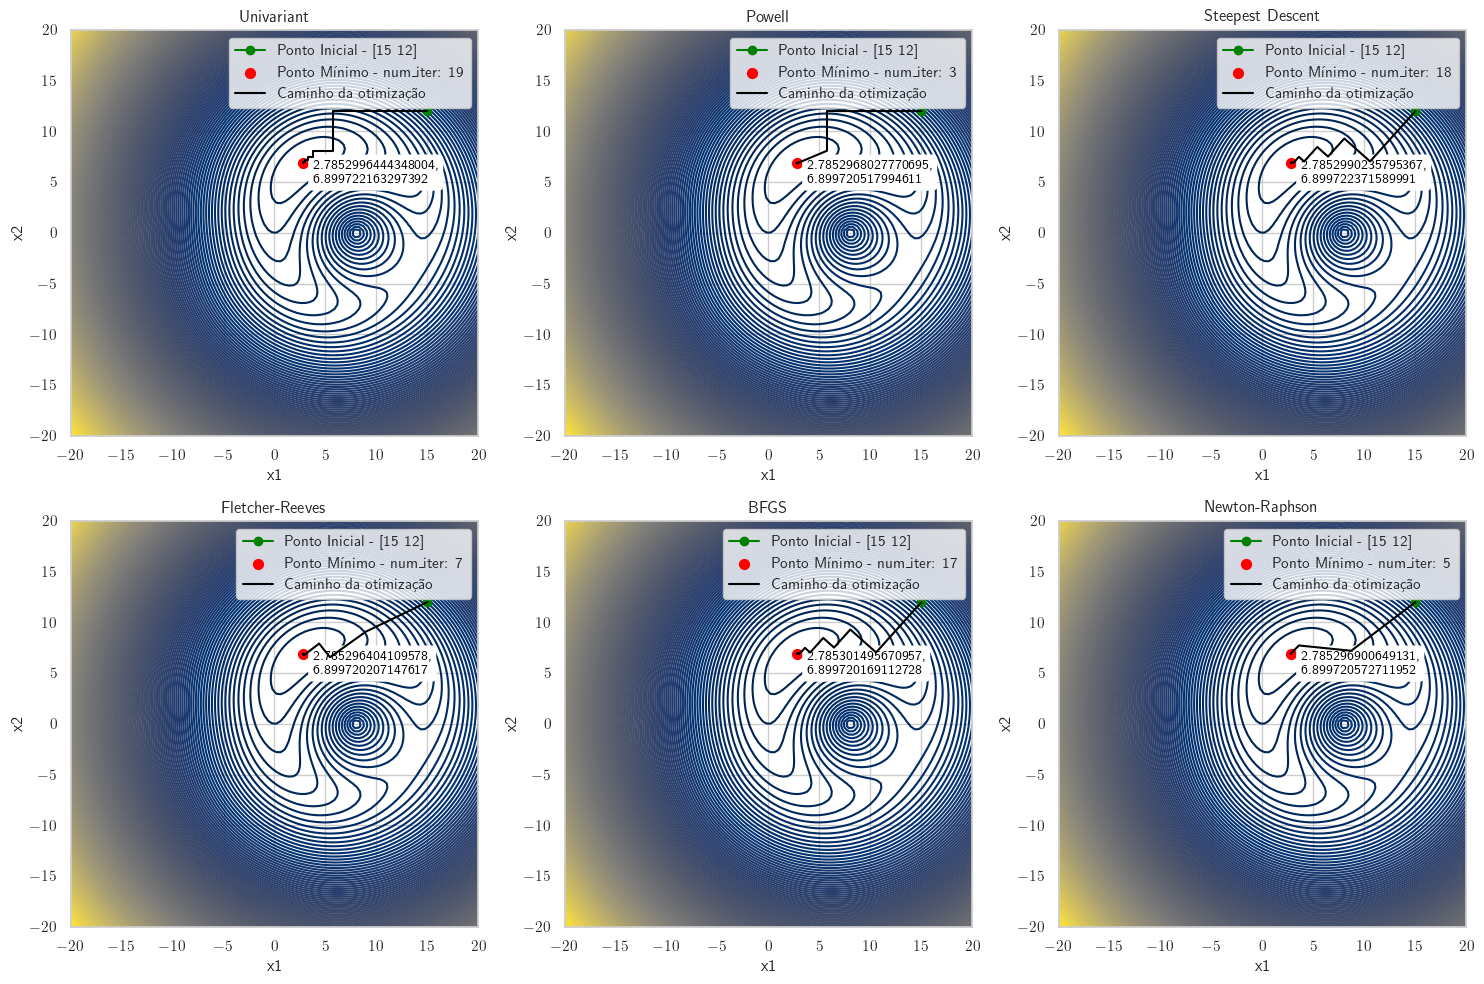

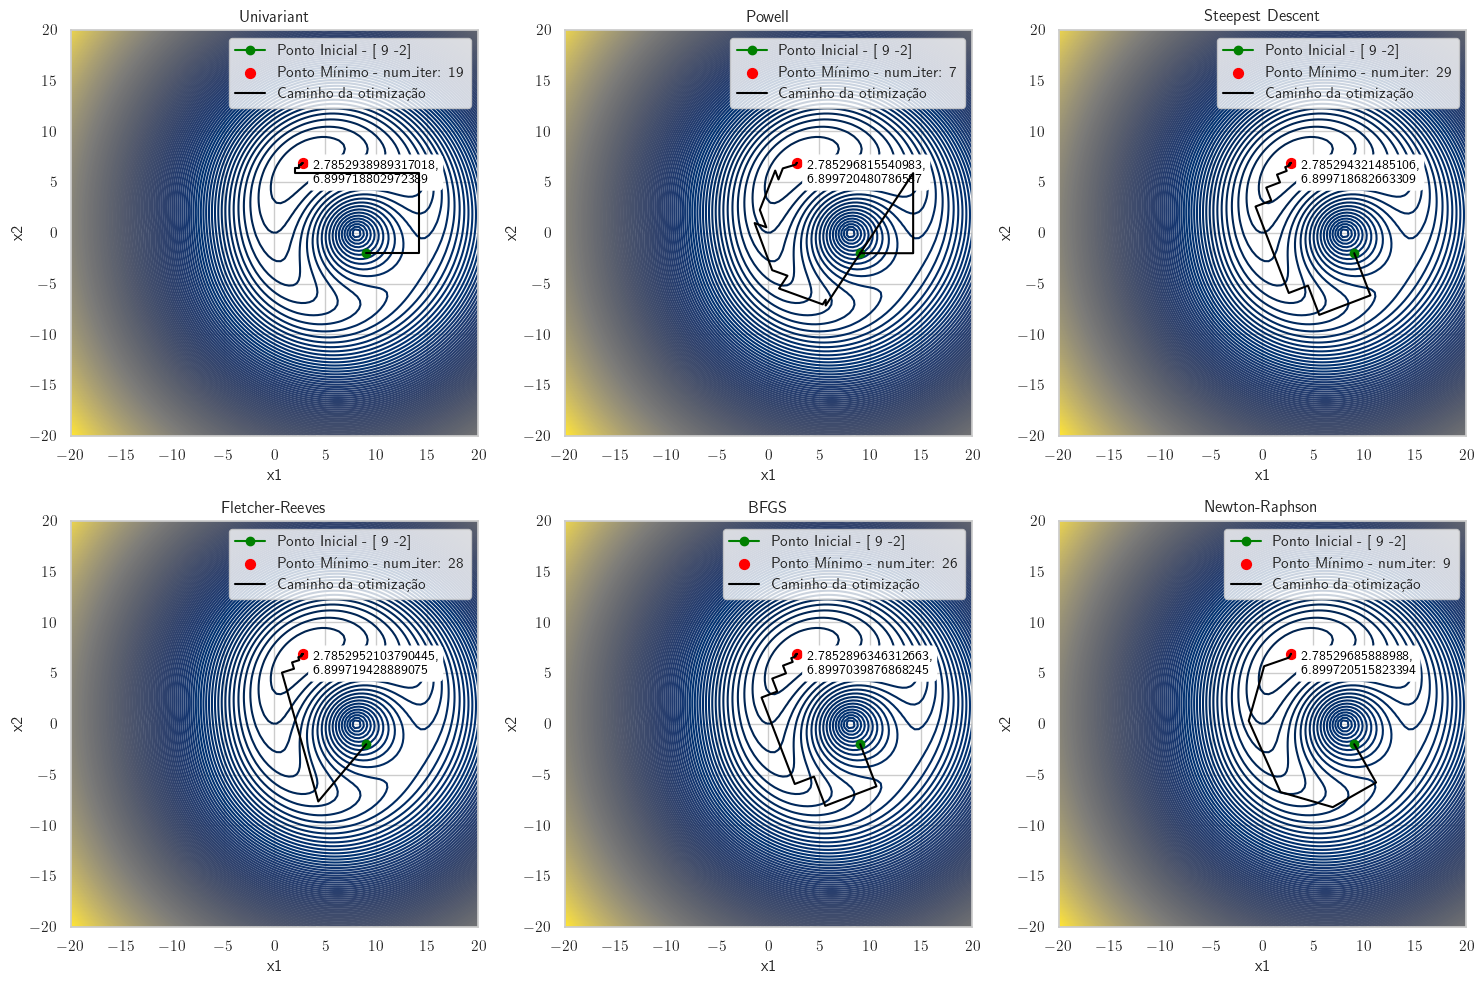

In [33]:
initial_point = [np.array([15,12]), np.array([9,-2])]

result = pd.DataFrame(columns=['Method', 'X0', 'XOPT', 'FMIN', 'NUM_ITER', 'TIME'])
for x0 in initial_point:
    METHODS_OPTIM = {
        'univariant': method_optim(method_name='univariant', objective_function=f, gradient=grad, initial_point=x0),
        'powell': method_optim(method_name='powell', objective_function=f, gradient=grad, initial_point=x0),
        'steepest_descent': method_optim(method_name='steepest_descent', objective_function=f, gradient=grad, initial_point=x0),
        'fletcher_reeves': method_optim(method_name='fletcher_reeves', objective_function=f, gradient=grad, initial_point=x0),
        'bfgs': method_optim(method_name='bfgs', objective_function=f, gradient=grad, initial_point=x0),
        'newton_raphson': method_optim(method_name='newton_raphson', objective_function=f, gradient=grad, hessian=hess, initial_point=x0),
        }
    methods = ['univariant', 'powell', 'steepest_descent', 'fletcher_reeves', 'bfgs', 'newton_raphson']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    for i, m in enumerate(methods):
        start = time.time()
        method =  METHODS_OPTIM[m]
        end = time.time()
        time_elapsed = end - start
        r = pd.DataFrame([[method['method_name'], x0, method['xopt'], method['fmin'], method['num_iter'], time_elapsed]], 
                        columns=['Method', 'X0', 'XOPT', 'FMIN', 'NUM_ITER', 'TIME'])
        result = pd.concat([result, r], ignore_index=True, axis=0)
        plot_countour(f, x0, method, ax=axes[i], path = True, box_size = 20)
    plt.tight_layout()
    plt.savefig(f'img/questao_2_{x0}.pdf'.format(x0))
result.to_latex('result.tex', index=False)